# A robust-contrast trainable ConvNet layer for image classification using  quaternion monogenic function
## Boxplots

*Contrast scale*

---
## Import libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Open Data

In [4]:
dataset_names = [
        'cats_vs_dogs_results.csv',
        'cifar10_results.csv',
        'fashion_mnist_results.csv',
        'mnist_results.csv']
paths = ['contrast_scale', 'q9_scale']
con = '$C_{S}$'


In [5]:
b = []
for names in dataset_names:
    for pth in paths:
        df_ = pd.read_csv('{}/{}'.format(pth, names), usecols=['Model', 'Level', 'Test', 'Test_acc'])
        b.append(df_)
df = pd.concat(b)
print(df.shape)


(480, 4)


## Clean data

In [6]:
df[['dataset','train_level', 'Train1']] = df.Model.str.split("-",expand=True,)
df[['Train', 'temp']] = df.Train1.str.split(".",expand=True,)
df.drop('Model', axis='columns', inplace=True)
df.drop('temp', axis='columns', inplace=True)
df.drop('Train1', axis='columns', inplace=True)

df['train_level']  = df.train_level.replace('100', '$d_0$')
df['train_level']  = df.train_level.replace('10', '$d_3$')
df['train_level']  = df.train_level.replace('30', '$d_1$')
df['train_level']  = df.train_level.replace('70', '$d_2$')
df['dataset']  = df.dataset.replace('cats_vs_dogs', 'DvsC')
df['dataset']  = df.dataset.replace('cifar10', 'CIFAR-10')
df['dataset']  = df.dataset.replace('mnist', 'MNIST')
df['dataset']  = df.dataset.replace('fashion_mnist', 'fashion MNIST')

df.head()

Level  Test  Test_acc dataset train_level Train
0    1.0   A1C  0.509028    DvsC       $d_3$   A1C
1    1.0   A1C  0.670679    DvsC       $d_0$   A1C
2    1.0   A1C  0.564918    DvsC       $d_1$   A1C
3    1.0   A1C  0.619948    DvsC       $d_2$   A1C
4    1.0  A1M6  0.640871    DvsC       $d_3$  A1M6

## Maximum test accuracy values

In [7]:
models = ['A1', 'A2', 'A3']
dat = df.dataset.unique()
lev = df.train_level.unique()
out = []
r2 = []
header =df.columns
for m in models:
    #print(m)
    for d in dat:
        #get the test acc values by model and dataset
        tmp0 = df.loc[(df.Test.str.contains(m)) & (df['dataset'] == d) &  (df.train_level.str.contains('d'))]
        # get the maximum test acc from all models (C, Q9, and M6)
        tmp1 = tmp0[tmp0.Test_acc == tmp0.Test_acc.max()]
        #add dval colum  (square difference)
        tmp0['dval'] = (tmp0.Test_acc - tmp0.Test_acc.max())**2 
        header2 =tmp0.columns
        #Create new list with the most important information
        for index, rows in tmp0.iterrows():
            my_list0 =[rows.Level, rows.Test, rows.Test_acc, rows.dataset,rows.train_level, rows.Train, rows.dval]
            r2.append(my_list0)
        for index, rows in tmp1.iterrows():
            my_list =[rows.Level, rows.Test, rows.Test_acc, rows.dataset,rows.train_level, rows.Train]
            out.append(my_list)
         #   print(tmp1)
df_out = pd.DataFrame(out, columns=header) #Maximum values
df_r2 = pd.DataFrame(r2, columns=header2)  #r square difference

/home/umoya/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


### Number of maximum values for each dataset and model

    Level  Test  Test_acc        dataset train_level Train
0     1.0  A1M6  0.683290           DvsC       $d_0$  A1M6
1     0.7   A1C  0.520400       CIFAR-10       $d_2$   A1C
2     1.0   A1C  0.902900  fashion MNIST       $d_0$   A1C
3     0.1  A1Q9  0.986571          MNIST       $d_3$  A1Q9
4     1.0   A2C  0.696188           DvsC       $d_0$   A2C
5     0.3   A2C  0.532400       CIFAR-10       $d_1$   A2C
6     1.0   A2C  0.899100  fashion MNIST       $d_0$   A2C
7     0.3   A2C  0.987500          MNIST       $d_1$   A2C
8     0.7   A3C  0.855546           DvsC       $d_2$   A3C
11    0.7  A3M6  0.593300       CIFAR-10       $d_0$  A3M6


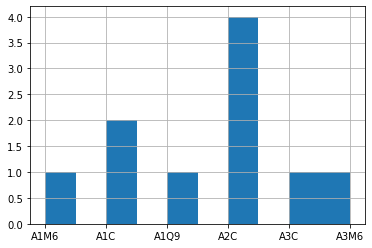

In [8]:
sds = df_out.drop_duplicates(subset='Test_acc', keep="last")
print(sds)
sds.Test.hist()
plt.show()

### Get the  values for each dash-line (maximum values)

In [9]:
A1blue = df_out[(df_out.Test.str.contains('A1')) & (df_out['dataset'] == 'MNIST')].Test_acc.unique()
A1orange = df_out[(df_out.Test.str.contains('A1')) & (df_out['dataset'] == 'fashion MNIST')].Test_acc.unique()
A1green = df_out[(df_out.Test.str.contains('A1')) & (df_out['dataset'] == 'CIFAR-10')].Test_acc.unique()
A1red = df_out[(df_out.Test.str.contains('A1')) & (df_out['dataset'] == 'DvsC')].Test_acc.unique()

A2blue = df_out[(df_out.Test.str.contains('A2')) & (df_out['dataset'] == 'MNIST')].Test_acc.unique()
A2orange = df_out[(df_out.Test.str.contains('A2')) & (df_out['dataset'] == 'fashion MNIST')].Test_acc.unique()
A2green = df_out[(df_out.Test.str.contains('A2')) & (df_out['dataset'] == 'CIFAR-10')].Test_acc.unique()
A2red = df_out[(df_out.Test.str.contains('A2')) & (df_out['dataset'] == 'DvsC')].Test_acc.unique()

A3green = df_out[(df_out.Test.str.contains('A3')) & (df_out['dataset'] == 'CIFAR-10')].Test_acc.unique()
A3red = df_out[(df_out.Test.str.contains('A3')) & (df_out['dataset'] == 'DvsC')].Test_acc.unique()


### Compute the sum of the square differences of the maximum

In [10]:

ac = df_r2.loc[(df_r2.Test.str.contains('C'))]['dval'].sum()
am6 = df_r2.loc[(df_r2.Test.str.contains('M6'))]['dval'].sum()
aq9 = df_r2.loc[(df_r2.Test.str.contains('Q9'))]['dval'].sum()
print(" Sum of squares differences C", ac,'\n Sum of squares differences M6',am6,' \n Sum of squares differences Q9', aq9)

 Sum of squares differences C 16.246208974768958 
 Sum of squares differences M6 0.3274813639016  
 Sum of squares differences Q9 2.377174484022992


---
## Display values in a Table

In [11]:
df =  df.rename(columns={'Train': 'Model', 'train_level': 'Degradation in trained model'})

In [12]:
df.groupby(['Model', 'dataset']).Test_acc.describe()

count      mean       std       min       25%       50%  \
Model dataset                                                                  
A1C   CIFAR-10        16.0  0.282806  0.137641  0.120400  0.171125  0.236750   
      DvsC            16.0  0.557305  0.059963  0.492978  0.501791  0.548581   
      MNIST           16.0  0.689288  0.346884  0.089200  0.335200  0.900000   
      fashion MNIST   16.0  0.685531  0.270266  0.100000  0.586750  0.826450   
A1M6  CIFAR-10        16.0  0.454363  0.016899  0.422000  0.440375  0.454000   
      DvsC            16.0  0.656008  0.012382  0.640871  0.647678  0.650473   
      MNIST           16.0  0.958575  0.022161  0.917000  0.946825  0.958500   
      fashion MNIST   16.0  0.874306  0.021633  0.815900  0.867650  0.884350   
A1Q9  CIFAR-10        16.0  0.392458  0.049821  0.258167  0.386042  0.409083   
      DvsC            16.0  0.617184  0.023196  0.572411  0.604856  0.625054   
      MNIST           16.0  0.975018  0.013988  0.940857  0.968500  0.980571   
      fashion MNIST   16.0  0.832348  0.085982  0.634429  0.780786  0.877857   
A2C   CIFAR-10        16.0  0.291594  0.161547  0.100000  0.180375  0.219500   
      DvsC            16.0  0.559240  0.082591  0.488105  0.492978  0.502150   
      MNIST           16.0  0.737956  0.340396  0.089200  0.720725  0.892350   
      fashion MNIST   16.0  0.704762  0.249518  0.122100  0.638125  0.809500   
A2M6  CIFAR-10        16.0  0.484206  0.019812  0.438400  0.482000  0.493850   
      DvsC            16.0  0.671396  0.009525  0.656062  0.666882  0.671252   
      MNIST           16.0  0.984350  0.002047  0.979100  0.983375  0.984750   
      fashion MNIST   16.0  0.880556  0.005928  0.867600  0.877425  0.881050   
A2Q9  CIFAR-10        16.0  0.422177  0.046147  0.289500  0.417000  0.440083   
      DvsC            16.0  0.595590  0.023294  0.556081  0.574130  0.602707   
      MNIST           16.0  0.973839  0.016445  0.940857  0.964607  0.983357   
      fashion MNIST   16.0  0.815813  0.103843  0.580429  0.765643  0.872643   
A3C   CIFAR-10        16.0  0.253888  0.200289  0.077800  0.105125  0.132200   
      DvsC            16.0  0.616330  0.147321  0.466609  0.493408  0.556750   
A3M6  CIFAR-10        16.0  0.584506  0.008957  0.569200  0.577325  0.586250   
      DvsC            16.0  0.763972  0.011823  0.744626  0.756735  0.765406   
A3Q9  CIFAR-10        16.0  0.432781  0.056426  0.318333  0.402333  0.454500   
      DvsC            16.0  0.658842  0.057256  0.533734  0.640309  0.680705   

                          75%       max  
Model dataset                            
A1C   CIFAR-10       0.396475  0.520400  
      DvsC           0.593078  0.670679  
      MNIST          0.974200  0.986400  
      fashion MNIST  0.875550  0.902900  
A1M6  CIFAR-10       0.467550  0.478000  
      DvsC           0.663156  0.683290  
      MNIST          0.979700  0.980500  
      fashion MNIST  0.887625  0.890700  
A1Q9  CIFAR-10       0.427917  0.432500  
      DvsC           0.633111  0.645896  
      MNIST          0.985250  0.986571  
      fashion MNIST  0.893607  0.900000  
A2C   CIFAR-10       0.458450  0.532400  
      DvsC           0.620737  0.696188  
      MNIST          0.984750  0.987500  
      fashion MNIST  0.874800  0.899100  
A2M6  CIFAR-10       0.496025  0.498600  
      DvsC           0.678131  0.684150  
      MNIST          0.985600  0.987100  
      fashion MNIST  0.886100  0.888900  
A2Q9  CIFAR-10       0.451792  0.457000  
      DvsC           0.609798  0.639450  
      MNIST          0.985071  0.987286  
      fashion MNIST  0.892036  0.896571  
A3C   CIFAR-10       0.424600  0.584200  
      DvsC           0.718401  0.855546  
A3M6  CIFAR-10       0.592900  0.593300  
      DvsC           0.770923  0.781026  
A3Q9  CIFAR-10       0.474417  0.489667  
      DvsC           0.697035  0.714654

## Display the main grid of boxen plots

<Figure size 864x576 with 0 Axes>

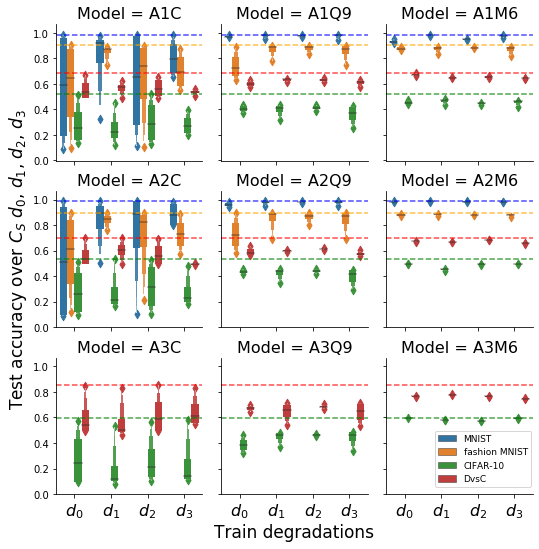

In [13]:
fig = plt.gcf()
fig.set_size_inches(12, 8)

grid = sns.catplot(x='Degradation in trained model', 
            y='Test_acc', hue='dataset', data=df, 
            col="Model", kind="boxen", 
            height=2.5, aspect=1, col_wrap=3,
            order=['$d_0$','$d_1$','$d_2$','$d_3$'], 
            hue_order=['MNIST', 'fashion MNIST','CIFAR-10','DvsC'], legend = False, 
            col_order =['A1C','A1Q9','A1M6', 'A2C', 'A2Q9','A2M6','A3C','A3Q9','A3M6'], linewidth=1   )

grid.set_xticklabels(fontsize = 16)
grid.set_titles(size=16)
grid.set_ylabels('',fontsize = 14)
grid.set_xlabels('',  fontsize = 14)


grid.axes[7].set_xlabel('Train degradations', fontsize = 17)
grid.axes[3].set_ylabel('Test accuracy over {} $d_0$, $d_1$, $d_2$, $d_3$'.format(con), fontsize = 17)

#Dash lines for the maximum
for i in range(0,3):
    grid.axes[i].axhline(A1blue, ls='--', c='blue', alpha=.7)
    grid.axes[i].axhline(A1orange, ls='--', c='orange', alpha=.7)
    grid.axes[i].axhline(A1red, ls='--', c='red', alpha=.7)
    grid.axes[i].axhline(A1green, ls='--', c='green', alpha=.7)

for i in range(3,6):
    grid.axes[i].axhline(A2blue, ls='--', c='blue', alpha=.7)
    grid.axes[i].axhline(A2orange, ls='--', c='orange', alpha=.7)
    grid.axes[i].axhline(A2red, ls='--', c='red', alpha=.7)
    grid.axes[i].axhline(A2green, ls='--', c='green', alpha=.7)


for i in range(6,9):
    grid.axes[i].axhline(A3red, ls='--', c='red', alpha=.7)
    grid.axes[i].axhline(A3green, ls='--', c='green', alpha=.7)
    
#fig.tight_layout() 
plt.legend(bbox_to_anchor=(0.3, 0.5, .72, 0), loc="upper left", mode="expand", ncol=1, fontsize=9)
#plt.savefig('c_s3_3.eps', format='eps', dpi=300)
plt.show()